In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

plt.style.use('default')

In [3]:
MAX_POP = 104044

In [2]:
R10_FULL = '../quantum/1669604736809_kochi/state_30_15_10/survivorsPerSim_1x10.csv'
R100_FULL = '../quantum/1667312021824_kochi/state_30_15_100/survivorsPerSim_1x100.csv'
R200_FULL = '../quantum/1667343295078_kochi/state_30_15_200/survivorsPerSim_1x200.csv'
R1000_FULL = '../quantum/1667397034788_kochi/state_30_15_1000/survivorsPerSim_1x1000.csv' #108000
# R1000_FULL = '../quantum/1667389305395_kochi/state_30_15_1000/survivorsPerSim_1x1000.csv' #30
# R10000_FULL = '../quantum/166_kochi/state_30_15_10000/survivorsPerSim_1x10000.csv'
# R100000_FULL = '../quantum/166_kochi/state_30_15_100000/survivorsPerSim_1x100000.csv'

In [4]:
df10_f = pd.read_csv(R10_FULL, header=None)
df100_f = pd.read_csv(R100_FULL, header=None)
df200_f = pd.read_csv(R200_FULL, header=None)
df1000_f = pd.read_csv(R1000_FULL, header=None)
# df10000_f = pd.read_csv(R10000_FULL, header=None)
# df100000_f = pd.read_csv(R100000_FULL, header=None)

<AxesSubplot: >

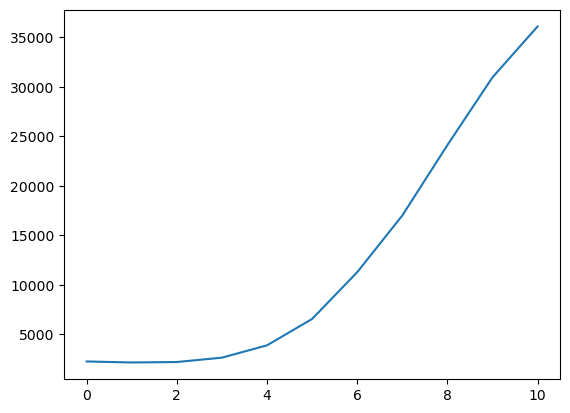

In [5]:
df10_f[1].plot()

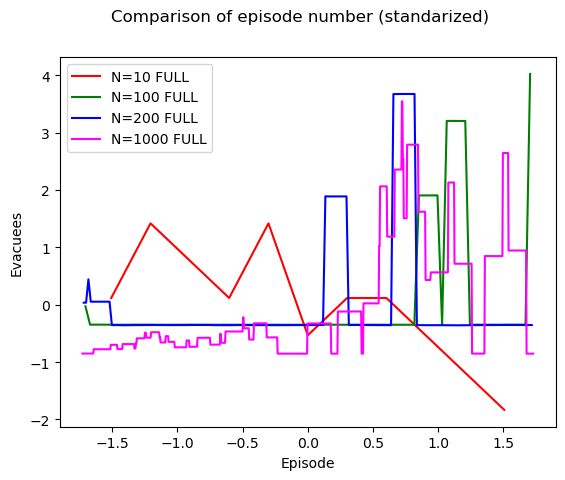

In [6]:
# copy the data
df10_f_z_scaled = df10_f.copy()
df100_f_z_scaled = df100_f.copy()
df200_f_z_scaled = df200_f.copy()
df1000_f_z_scaled = df1000_f.copy()
# df10000_f_z_scaled = df10000_f.copy()
# df100000_f_z_scaled = df100000_f.copy()

df100_f_z_scaled = df100_f_z_scaled.rolling(5).mean()
df200_f_z_scaled = df200_f_z_scaled.rolling(10).mean()
df1000_f_z_scaled = df1000_f_z_scaled.rolling(50).mean()
# df10000_f_z_scaled = df10000_f_z_scaled.rolling(500).mean()
# df100000_f_z_scaled = df100000_f_z_scaled.rolling(5000).mean()

# apply normalization technique to Column 0
for i in [0,1]:
    df10_f_z_scaled[i] = (df10_f_z_scaled[i] - df10_f_z_scaled[i].mean()) / df10_f_z_scaled[i].std()
    df100_f_z_scaled[i] = (df100_f_z_scaled[i] - df100_f_z_scaled[i].mean()) / df100_f_z_scaled[i].std()
    df200_f_z_scaled[i] = (df200_f_z_scaled[i] - df200_f_z_scaled[i].mean()) / df200_f_z_scaled[i].std()
    df1000_f_z_scaled[i] = (df1000_f_z_scaled[i] - df1000_f_z_scaled[i].mean()) / df1000_f_z_scaled[i].std()
    # df10000_f_z_scaled[i] = (df10000_f_z_scaled[i] - df10000_f_z_scaled[i].mean()) / df10000_f_z_scaled[i].std() 
    # df100000_f_z_scaled[i] = (df100000_f_z_scaled[i] - df100000_f_z_scaled[i].mean()) / df100000_f_z_scaled[i].std()  
    
#plot
fig, ax = plt.subplots()
fig.suptitle('Comparison of episode number (standarized)')
# ax.plot(df10_z_scaled[0], df10_z_scaled[1], '--', c='red',label='N=10')
# ax.plot(df100_z_scaled[0], df100_z_scaled[1], '--',c='green',label='N=100')
# ax.plot(df200_z_scaled[0], df200_z_scaled[1], '--',c='blue',label='N=200')

ax.plot(df10_f_z_scaled[0], df10_f_z_scaled[1], '-', c='red',label='N=10 FULL')
ax.plot(df100_f_z_scaled[0], df100_f_z_scaled[1], '-',c='green', label='N=100 FULL')
ax.plot(df200_f_z_scaled[0], df200_f_z_scaled[1], '-',c='blue', label='N=200 FULL')
ax.plot(df1000_f_z_scaled[0], df1000_f_z_scaled[1], '-',c='magenta', label='N=1000 FULL')
# ax.plot(df10000_f_z_scaled[0], df10000_f_z_scaled[1], '-',c='orange', label='N=10000 FULL')
# ax.plot(df100000_f_z_scaled[0], df100000_f_z_scaled[1], '-',c='cyan', label='N=100000 FULL')

ax.set_xlabel('Episode')
ax.set_ylabel('Evacuees')
# ax.set_ylim(0,MAX_POP)
ax.legend()
plt.show()


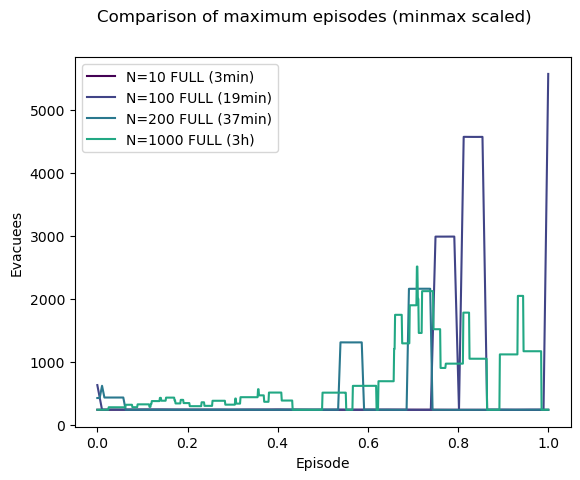

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# copy the data
df10_f_sklearn = df10_f.copy()
df100_f_sklearn = df100_f.copy()
df200_f_sklearn = df200_f.copy()
df1000_f_sklearn = df1000_f.copy()
# df10000_f_sklearn = df10000_f.copy()
# df100000_f_sklearn = df100000_f.copy()

df100_f_sklearn = df100_f_sklearn.rolling(5).mean()
df200_f_sklearn = df200_f_sklearn.rolling(10).mean()
df1000_f_sklearn = df1000_f_sklearn.rolling(50).mean()
# df10000_f_sklearn = df10000_f_sklearn.rolling(500).mean()
# df100000_f_sklearn = df100000_f_sklearn.rolling(5000).mean()

# apply normalization techniques
for i in [0,1]:
    df10_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df10_f_sklearn[0]).reshape(-1,1))
    df100_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df100_f_sklearn[0]).reshape(-1,1))
    df200_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df200_f_sklearn[0]).reshape(-1,1))
    df1000_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df1000_f_sklearn[0]).reshape(-1,1))
    # df10000_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df10000_f_sklearn[0]).reshape(-1,1))
    # df100000_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df100000_f_sklearn[0]).reshape(-1,1))
    
#plot
fig, ax = plt.subplots()
n=6
ax.set_prop_cycle('color',[plt.cm.viridis(i) for i in np.linspace(0,1,n)])
fig.suptitle('Comparison of maximum episodes (minmax scaled)')
# ax.plot(df10_sklearn[0], df10_sklearn[1], '--', c='r',label = 'N=10 (3min)')
# ax.plot(df100_sklearn[0], df100_sklearn[1], '--', c='g', label= 'N=100 (19min)')
# ax.plot(df200_sklearn[0], df200_sklearn[1], '--', c='b',label= 'N=200 (35min)')

ax.plot(df10_f_sklearn[0], df10_f_sklearn[1], '-', label = 'N=10 FULL (3min)')
ax.plot(df100_f_sklearn[0], df100_f_sklearn[1], '-', label = 'N=100 FULL (19min)')
ax.plot(df200_f_sklearn[0], df200_f_sklearn[1], '-', label = 'N=200 FULL (37min)')
ax.plot(df1000_f_sklearn[0], df1000_f_sklearn[1], '-', label = 'N=1000 FULL (3h)')
# ax.plot(df10000_f_sklearn[0], df10000_f_sklearn[1], '-', label = 'N=10000 FULL (30h)')
# ax.plot(df100000_f_sklearn[0], df100000_f_sklearn[1], '-', label = 'N=100000 FULL (300h)')

ax.set_xlabel('Episode')
ax.set_ylabel('Evacuees')
# ax.set_ylim(0,MAX_POP)
ax.legend()
plt.show()

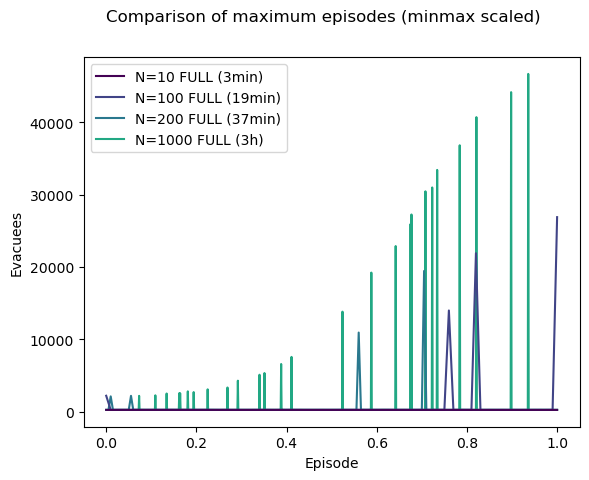

In [9]:
import numpy as np

df10_f_sklearn = df10_f.copy()
df100_f_sklearn = df100_f.copy()
df200_f_sklearn = df200_f.copy()
df1000_f_sklearn = df1000_f.copy()
# df10000_f_sklearn = df10000_f.copy()
# df100000_f_sklearn = df100000_f.copy()

# apply normalization techniques
for i in [0,1]:
    # df10_sklearn[0] = MinMaxScaler().fit_transform(np.array(df10_sklearn[0]).reshape(-1,1))
    # df100_sklearn[0] = MinMaxScaler().fit_transform(np.array(df100_sklearn[0]).reshape(-1,1))
    # df200_sklearn[0] = MinMaxScaler().fit_transform(np.array(df200_sklearn[0]).reshape(-1,1))
    
    df10_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df10_f_sklearn[0]).reshape(-1,1))
    df100_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df100_f_sklearn[0]).reshape(-1,1))
    df200_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df200_f_sklearn[0]).reshape(-1,1))
    df1000_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df1000_f_sklearn[0]).reshape(-1,1))
    # df10000_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df10000_f_sklearn[0]).reshape(-1,1))
    # df100000_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df100000_f_sklearn[0]).reshape(-1,1))
    
n=6
#plot
fig, ax = plt.subplots()
ax.set_prop_cycle('color',[plt.cm.viridis(i) for i in np.linspace(0,1,n)])
fig.suptitle('Comparison of maximum episodes (minmax scaled)')
# ax.plot(df10_sklearn[0], df10_sklearn[1], '--', c='r',label = 'N=10 (3min)')
# ax.plot(df100_sklearn[0], df100_sklearn[1], '--', c='g', label= 'N=100 (19min)')
# ax.plot(df200_sklearn[0], df200_sklearn[1], '--', c='b',label= 'N=200 (35min)')

ax.plot(df10_f_sklearn[0], df10_f_sklearn[1], label = 'N=10 FULL (3min)', zorder=6)
ax.plot(df100_f_sklearn[0], df100_f_sklearn[1], label = 'N=100 FULL (19min)', zorder=5)
ax.plot(df200_f_sklearn[0], df200_f_sklearn[1], label = 'N=200 FULL (37min)', zorder=4)
ax.plot(df1000_f_sklearn[0], df1000_f_sklearn[1], label = 'N=1000 FULL (3h)', zorder=3)
# ax.plot(df10000_f_sklearn[0], df10000_f_sklearn[1], label = 'N=10000 FULL (30h)', zorder=2)
# ax.plot(df100000_f_sklearn[0], df100000_f_sklearn[1], label = 'N=100000 FULL (300h)', zorder=1)

ax.set_xlabel('Episode')
ax.set_ylabel('Evacuees')
# ax.set_ylim(0,MAX_POP)
ax.legend()
plt.show()

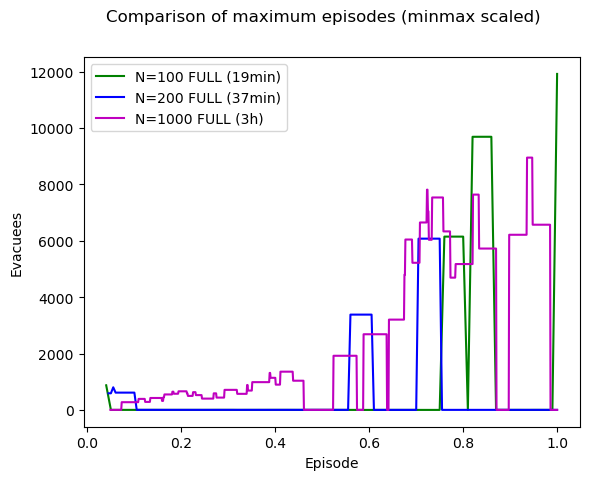

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# copy the data

df10_f_sklearn = df10_f.copy()
df100_f_sklearn = df100_f.copy()
df200_f_sklearn = df200_f.copy()
df1000_f_sklearn = df1000_f.copy()
# df10000_f_sklearn = df10000_f.copy()
# df100000_f_sklearn = df100000_f.copy()

df100_f_sklearn = df100_f_sklearn.rolling(5).std()
df200_f_sklearn = df200_f_sklearn.rolling(10).std()
df1000_f_sklearn = df1000_f_sklearn.rolling(50).std()
# df10000_f_sklearn = df10000_f_sklearn.rolling(500).std()
# df100000_f_sklearn = df100000_f_sklearn.rolling(5000).std()

# apply normalization techniques
for i in [0,1]:
    # df10_sklearn[0] = MinMaxScaler().fit_transform(np.array(df10_sklearn[0]).reshape(-1,1))
    # df100_sklearn[0] = MinMaxScaler().fit_transform(np.array(df100_sklearn[0]).reshape(-1,1))
    # df200_sklearn[0] = MinMaxScaler().fit_transform(np.array(df200_sklearn[0]).reshape(-1,1))
    
    # df10_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df10_f_sklearn[0]).reshape(-1,1))
    df100_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df100_f_sklearn.index).reshape(-1,1))
    df200_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df200_f_sklearn.index).reshape(-1,1))
    df1000_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df1000_f_sklearn.index).reshape(-1,1))
    # df10000_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df10000_f_sklearn.index).reshape(-1,1))
    # df100000_f_sklearn[0] = MinMaxScaler().fit_transform(np.array(df100000_f_sklearn.index).reshape(-1,1))
    
#plot
fig, ax = plt.subplots()
fig.suptitle('Comparison of maximum episodes (minmax scaled)')
# ax.plot(df10_sklearn[0], df10_sklearn[1], '--', c='r',label = 'N=10 (3min)')
# ax.plot(df100_sklearn[0], df100_sklearn[1], '--', c='g', label= 'N=100 (19min)')
# ax.plot(df200_sklearn[0], df200_sklearn[1], '--', c='b',label= 'N=200 (35min)')

# ax.plot(df10_f_sklearn[0], df10_f_sklearn[1], '-', c='r',label = 'N=10 FULL (3min)')
ax.plot(df100_f_sklearn[0], df100_f_sklearn[1], '-', c='g',label = 'N=100 FULL (19min)')
ax.plot(df200_f_sklearn[0], df200_f_sklearn[1], '-', c='b',label = 'N=200 FULL (37min)')
ax.plot(df1000_f_sklearn[0], df1000_f_sklearn[1], '-', c='m',label = 'N=1000 FULL (3h)')
# ax.plot(df10000_f_sklearn[0], df10000_f_sklearn[1], '-', c='orange',label = 'N=10000 FULL (30h)')
# ax.plot(df100000_f_sklearn[0], df100000_f_sklearn[1], '-', c='cyan',label = 'N=100000 FULL (300h)')

ax.set_xlabel('Episode')
ax.set_ylabel('Evacuees')
# ax.set_ylim(0,MAX_POP)
ax.legend()
plt.show()